In [16]:
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib import pylab as plt
from sklearn import svm
from sklearn import preprocessing, linear_model, model_selection, metrics, random_projection

# Support Vector Machines (SVM)
This machine learning approach is used for classification, regression and outlier detection. The SVM is used for number of dimensions is more than number of samples. If number of features are more than number of samples we need to use regularization paramters to avoid overfitting. 

In [7]:
df = pd.read_csv('./data/mushrooms.csv')
df.head(4)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [8]:
y = df['class'].apply(lambda x:1 if x=='e' else 0).values
df.drop('class', axis=1, inplace=True)

x = df.apply(preprocessing.LabelEncoder().fit_transform)

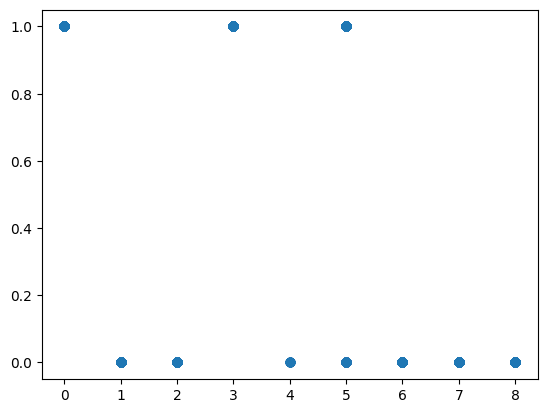

In [15]:
plt.scatter(x['odor'], y)

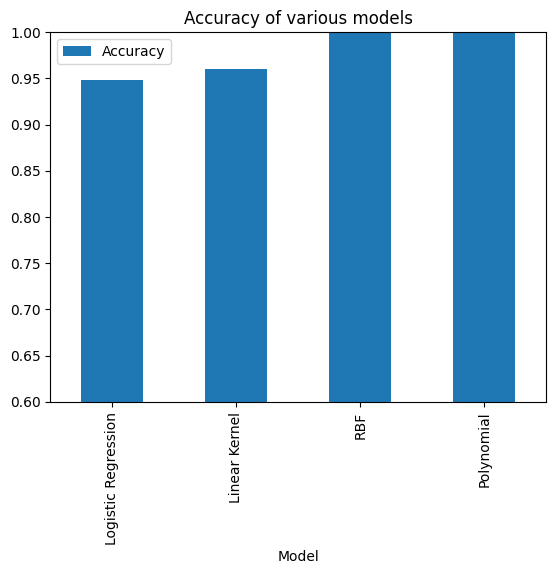

In [29]:

import pandas as pd

cv = model_selection.ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
C = 0.5

models = [
    ("Logistic Regression", linear_model.LogisticRegression(solver='newton-cg')),
    ("Linear Kernel", svm.SVC(kernel='linear', C=C)),
    ("RBF", svm.SVC(kernel='rbf', C=C, gamma='auto')),
    ("Polynomial", svm.SVC(kernel='poly', degree=2, gamma='auto'))
]

pd.DataFrame([
    (name, model_selection.cross_val_score(clf, x, y, scoring='accuracy', cv=cv).mean()) for name, clf in models
], columns=["Model", "Accuracy"]).plot(x="Model", 
                                       y="Accuracy", 
                                       kind="bar", 
                                       title="Accuracy of various models", 
                                       ylim=[.6,1.]);

In [30]:
for name, clf in models:
    print(name)
    print(model_selection.cross_val_score(clf, x, y, scoring='accuracy', cv=cv).mean())

Logistic Regression
0.9484654521582144
Linear Kernel
0.960282291153783
RBF
1.0
Polynomial
1.0
